# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Muh. Rinaldi Ruslan
- **Email:** rinaldi.ruslan51@gmail.com
- **ID Dicoding:** rinaldi51

## Menentukan Pertanyaan Bisnis

1. Produk apa yang paling laris dan menghasilkan pendapatan tertinggi?
2. Bagaimana tren penjualan dari waktu ke waktu?
3. Apakah ada pola musiman dalam penjualan?
4. Dari negara mana saja pelanggan berasal dan bagaimana kontribusi penjualan dari masing-masing negara?
5. Siapa pelanggan dengan pembelian terbanyak?

## Import Semua Packages/Library yang Digunakan

In [287]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

## Data Wrangling

### Gathering Data

In [288]:
# Membaca data yang relevan
customers = pd.read_csv('E-Commerce Public Dataset/customers_dataset.csv')
geolocation = pd.read_csv('E-Commerce Public Dataset/geolocation_dataset.csv')
order_items = pd.read_csv('E-Commerce Public Dataset/order_items_dataset.csv')
orders = pd.read_csv('E-Commerce Public Dataset/orders_dataset.csv')
products = pd.read_csv('E-Commerce Public Dataset/products_dataset.csv')
product_category_name_translation = pd.read_csv('E-Commerce Public Dataset/product_category_name_translation.csv')

# --- Menggabungkan data yang relevan ---

# Menggabungkan order_items dengan products
order_items = order_items.merge(products, on='product_id')

# Menggabungkan order_items dengan product_category_name_translation
order_items = order_items.merge(product_category_name_translation, on='product_category_name', how='left')

# --- Ubah nama kolom di customers dan orders sebelum merge ---
customers.rename(columns={'order_purchase_timestamp': 'customer_order_purchase_timestamp'}, inplace=True)  # Perbaikan di sini
orders = orders.merge(customers, on='customer_id', suffixes=('', '_customer'))

# Menampilkan beberapa baris pertama dari setiap data frame untuk memastikan data telah dibaca dengan benar
print("Dataset Pelanggan:")
print(customers.head())
print("\nDataset Geolokasi:")
print(geolocation.head())
print("\nDataset Item Pesanan:")
print(order_items.head())
print("\nDataset Pesanan:")
print(orders.head())
print("\nDataset Produk:")
print(products.head())
print("\nDataset Terjemahan Nama Kategori Produk:")
print(product_category_name_translation.head())

Dataset Pelanggan:
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  

Dataset Geolokasi:
   geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.54562

**Insight dari Gathering Data**
***Data yang Digunakan:***
1. customers: Informasi tentang pelanggan, penting untuk menghubungkan pesanan dengan pelanggan.
2. geolocation: Informasi geolokasi berdasarkan kode pos, penting untuk analisis geografis.
3. order_items: Informasi tentang item pesanan, penting untuk analisis produk terlaris dan pendapatan.
4. orders: Informasi tentang pesanan, penting untuk analisis tren penjualan dan menghubungkan pesanan dengan pelanggan.
5. products: Informasi tentang produk, penting untuk mendapatkan rincian produk yang dijual.
6. product_category_name_translation: Terjemahan nama kategori produk, memudahkan analisis dan interpretasi data.

***Data yang Tidak Digunakan:***
1. order_payments: Tidak relevan untuk pertanyaan bisnis yang ditentukan.
2. order_reviews: Tidak relevan untuk pertanyaan bisnis yang ditentukan.
3. sellers: Tidak relevan untuk pertanyaan bisnis yang ditentukan.

***Alasan Memilih Data Tertentu:***
- Relevansi dengan Pertanyaan Bisnis: Data yang dipilih relevan dan diperlukan untuk menjawab pertanyaan bisnis.
- Keterkaitan Data: Data yang dipilih memiliki keterkaitan yang kuat satu sama lain, memudahkan penggabungan dan analisis.

### Assessing Data

Dataset Pelanggan: (99441, 5)
Dataset Geolokasi: (1000163, 5)
Dataset Item Pesanan: (112650, 16)
Dataset Pesanan: (99441, 12)
Dataset Produk: (32951, 9)
Dataset Terjemahan Nama Kategori Produk: (71, 2)

Informasi Dataset Pelanggan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

Informasi Dataset Geolokasi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                   

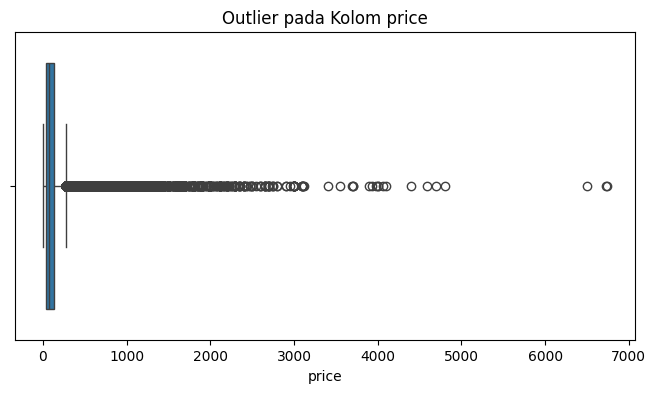

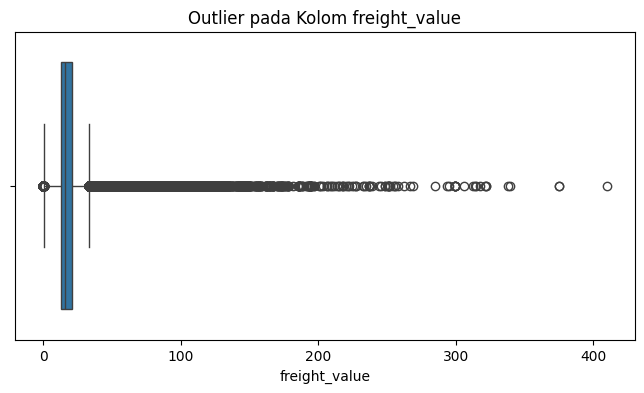

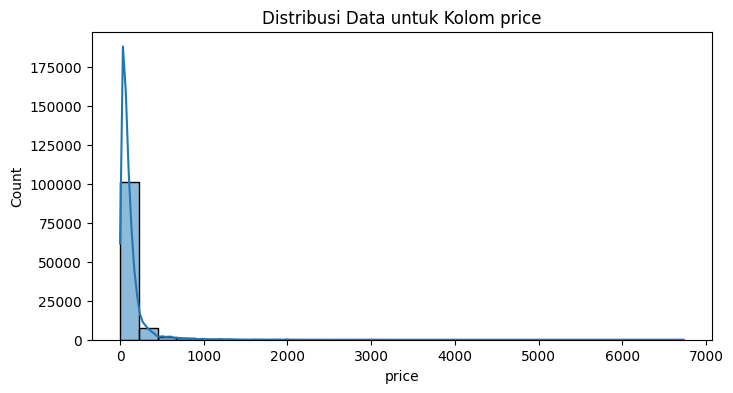

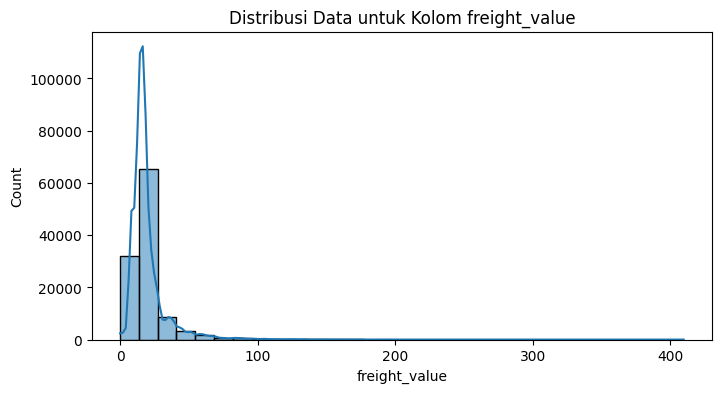


Memeriksa Tipe Data yang Tidak Sesuai:

Memeriksa Inkonsistensi Data:
Tidak ditemukan inkonsistensi antara customer_id dan customer_unique_id.
Ditemukan geolocation_zip_code_prefix yang sama dengan geolocation_lat dan geolocation_lng berbeda:
         geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                               1037       -23.545621       -46.639292   
1                               1046       -23.546081       -46.644820   
2                               1046       -23.546129       -46.642951   
3                               1041       -23.544392       -46.639499   
4                               1035       -23.541578       -46.641607   
...                              ...              ...              ...   
1000158                        99950       -28.068639       -52.010705   
1000159                        99900       -27.877125       -52.224882   
1000160                        99950       -28.071855       -52.014716   
1000161         

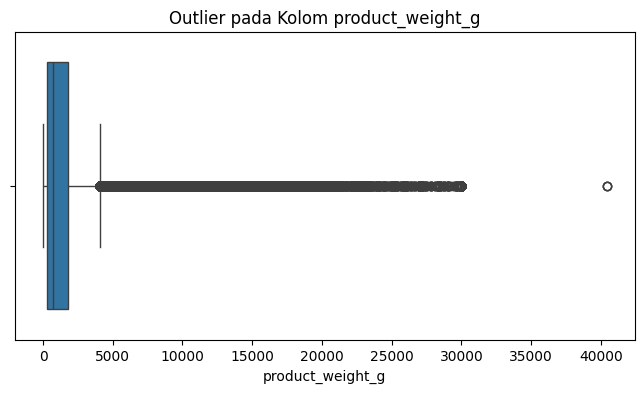

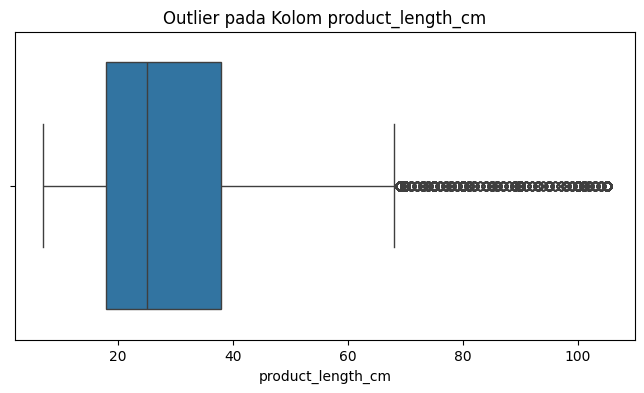

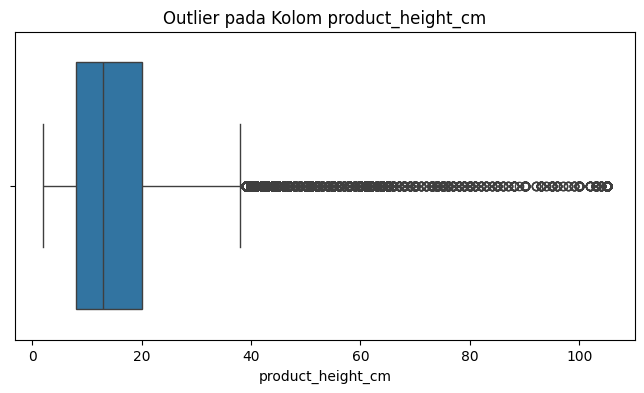

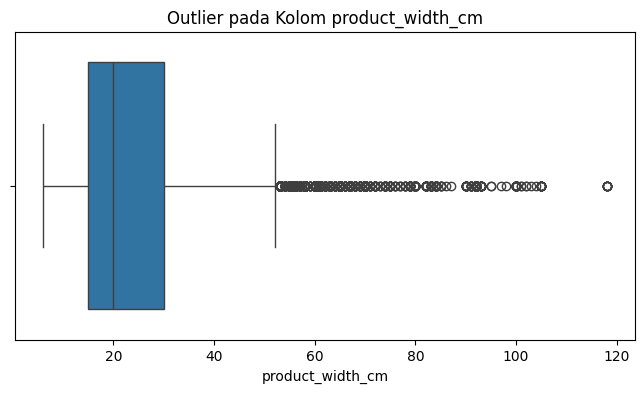

In [289]:
# --- Memeriksa jumlah baris dan kolom dari setiap dataset ---
print("Dataset Pelanggan:", customers.shape)
print("Dataset Geolokasi:", geolocation.shape)
print("Dataset Item Pesanan:", order_items.shape)
print("Dataset Pesanan:", orders.shape)
print("Dataset Produk:", products.shape)
print("Dataset Terjemahan Nama Kategori Produk:", product_category_name_translation.shape)

# --- Memeriksa tipe data dari setiap kolom ---
print("\nInformasi Dataset Pelanggan:")
customers.info()
print("\nInformasi Dataset Geolokasi:")
geolocation.info()
print("\nInformasi Dataset Item Pesanan:")
order_items.info()
print("\nInformasi Dataset Pesanan:")
orders.info()
print("\nInformasi Dataset Produk:")
products.info()
print("\nInformasi Dataset Terjemahan Nama Kategori Produk:")
product_category_name_translation.info()

# --- Memeriksa nilai yang hilang ---
print("\nNilai Hilang di Dataset Pelanggan:")
print(customers.isnull().sum())
print("\nNilai Hilang di Dataset Geolokasi:")
print(geolocation.isnull().sum())
print("\nNilai Hilang di Dataset Item Pesanan:")
print(order_items.isnull().sum())
print("\nNilai Hilang di Dataset Pesanan:")
print(orders.isnull().sum())
print("\nNilai Hilang di Dataset Produk:")
print(products.isnull().sum())
print("\nNilai Hilang di Dataset Terjemahan Nama Kategori Produk:")
print(product_category_name_translation.isnull().sum())

# --- Memeriksa data yang duplikat ---
print("\nData Duplikat di Dataset Pelanggan:")
print(customers.duplicated().sum())
print("\nData Duplikat di Dataset Geolokasi:")
print(geolocation.duplicated().sum())
print("\nData Duplikat di Dataset Item Pesanan:")
print(order_items.duplicated().sum())
print("\nData Duplikat di Dataset Pesanan:")
print(orders.duplicated().sum())
print("\nData Duplikat di Dataset Produk:")
print(products.duplicated().sum())
print("\nData Duplikat di Dataset Terjemahan Nama Kategori Produk:")
print(product_category_name_translation.duplicated().sum())

# --- Memeriksa statistik deskriptif ---
print("\nStatistik Deskriptif untuk Dataset Pelanggan:")
print(customers.describe(include='all'))
print("\nStatistik Deskriptif untuk Dataset Geolokasi:")
print(geolocation.describe(include='all'))
print("\nStatistik Deskriptif untuk Dataset Item Pesanan:")
print(order_items.describe(include='all'))
print("\nStatistik Deskriptif untuk Dataset Pesanan:")
print(orders.describe(include='all'))
print("\nStatistik Deskriptif untuk Dataset Produk:")
print(products.describe(include='all'))
print("\nStatistik Deskriptif untuk Dataset Terjemahan Nama Kategori Produk:")
print(product_category_name_translation.describe(include='all'))

# --- Memeriksa nilai negatif atau tidak valid ---
print("\nMemeriksa Nilai Negatif atau Tidak Valid:")
print("Harga Negatif pada Dataset Item Pesanan:", order_items[order_items['price'] < 0].shape[0])
print("Jumlah Barang Negatif pada Dataset Item Pesanan:", order_items[order_items['order_item_id'] < 0].shape[0])

# --- Memeriksa konsistensi kolom tanggal ---
print("\nMemeriksa Konsistensi Kolom Tanggal:")
print("Jumlah Pesanan dengan Tanggal Disetujui Sebelum Dibuat:", 
      orders[orders['order_approved_at'] < orders['order_purchase_timestamp']].shape[0])
print("Jumlah Pesanan dengan Tanggal Diterima Sebelum Dikirim:", 
      orders[orders['order_delivered_customer_date'] < orders['order_delivered_carrier_date']].shape[0])

# --- Mendeteksi outlier menggunakan boxplot ---
numeric_columns = ['price', 'freight_value']  # Kolom numerik utama yang bisa ditinjau
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=order_items[col])
    plt.title(f'Outlier pada Kolom {col}')
    plt.show()

# --- Meninjau distribusi data dengan histogram ---
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(order_items[col], kde=True, bins=30)
    plt.title(f'Distribusi Data untuk Kolom {col}')
    plt.show()

# --- Memeriksa tipe data yang tidak sesuai ---
print("\nMemeriksa Tipe Data yang Tidak Sesuai:")
for df_name, df in [('customers', customers), ('geolocation', geolocation), 
                    ('order_items', order_items), ('orders', orders), 
                    ('products', products), ('product_category_name_translation', product_category_name_translation)]:
    for col in df.columns:
        if df[col].dtype == 'object':
            try:
                pd.to_numeric(df[col])
                print(f"Kolom {col} pada {df_name} bisa menjadi numerik.")
            except ValueError:
                pass
        elif 'date' in col.lower() and not pd.api.types.is_datetime64_any_dtype(df[col]):
            print(f"Kolom {col} pada {df_name} harus diubah ke tipe datetime.")

# --- Memeriksa inkonsistensi data ---
print("\nMemeriksa Inkonsistensi Data:")

# 1. Cek apakah ada customer_id yang sama dengan customer_unique_id berbeda, atau sebaliknya
inconsistent_customers = customers[customers.duplicated(subset=['customer_id'], keep=False) & \
                                   customers.duplicated(subset=['customer_unique_id'], keep=False)]
if inconsistent_customers.shape[0] > 0:
    print("Ditemukan inkonsistensi antara customer_id dan customer_unique_id:")
    print(inconsistent_customers)
else:
    print("Tidak ditemukan inkonsistensi antara customer_id dan customer_unique_id.")

# 2. Cek apakah ada geolocation_zip_code_prefix yang sama tetapi memiliki geolocation_lat dan geolocation_lng berbeda
inconsistent_geolocation = geolocation[geolocation.duplicated(subset=['geolocation_zip_code_prefix'], keep=False)]
if inconsistent_geolocation.shape[0] > 0:
    print("Ditemukan geolocation_zip_code_prefix yang sama dengan geolocation_lat dan geolocation_lng berbeda:")
    print(inconsistent_geolocation)
else:
    print("Tidak ditemukan geolocation_zip_code_prefix yang sama dengan geolocation_lat dan geolocation_lng berbeda.")

# 3. Cek apakah ada order_id yang sama tetapi memiliki product_id yang sama juga
inconsistent_order_items = order_items[order_items.duplicated(subset=['order_id', 'product_id'], keep=False)]
if inconsistent_order_items.shape[0] > 0:
    print("Ditemukan order_id yang sama dengan product_id yang sama:")
    print(inconsistent_order_items)
else:
    print("Tidak ditemukan order_id yang sama dengan product_id yang sama.")

# 4. Cek apakah ada order_id yang sama tetapi memiliki customer_id yang berbeda
inconsistent_orders = orders[orders.duplicated(subset=['order_id'], keep=False) & \
                             orders.duplicated(subset=['customer_id'], keep=False)]
if inconsistent_orders.shape[0] > 0:
    print("Ditemukan order_id yang sama dengan customer_id berbeda:")
    print(inconsistent_orders)
else:
    print("Tidak ditemukan order_id yang sama dengan customer_id berbeda.")

# 5. Periksa konsistensi urutan tanggal
inconsistent_dates = orders[(orders['order_approved_at'] < orders['order_purchase_timestamp']) | 
                           (orders['order_delivered_carrier_date'] < orders['order_approved_at']) | 
                           (orders['order_delivered_customer_date'] < orders['order_delivered_carrier_date']) | 
                           (orders['order_estimated_delivery_date'] < orders['order_delivered_customer_date'])]
if inconsistent_dates.shape[0] > 0:
    print("Ditemukan inkonsistensi urutan tanggal:")
    print(inconsistent_dates)
else:
    print("Tidak ditemukan inkonsistensi urutan tanggal.")

# --- Mendeteksi outlier menggunakan boxplot ---
numeric_columns_outlier = ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
for col in numeric_columns_outlier:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=order_items[col])
    plt.title(f'Outlier pada Kolom {col}')
    plt.show()

## Insight dari Assessing Data

Berikut adalah rangkuman dari hasil assessing data:

**1. Dataset Pelanggan (customers)**

*   Jumlah Baris dan Kolom: 99441 baris, 5 kolom
*   Nilai yang Hilang: Tidak ada
*   Data yang Duplikat: Tidak ada
*   Tipe Data:
    *   `customer_id`: object (string)
    *   `customer_unique_id`: object (string)
    *   `customer_zip_code_prefix`: int64 (integer)
    *   `customer_city`: object (string)
    *   `customer_state`: object (string)
*   Inkonsistensi Data: Tidak ditemukan inkonsistensi antara  `customer_id`  dan  `customer_unique_id`.
*   Outlier: Tidak ada outlier karena semua kolom berisi data kategorikal.

**2. Dataset Geolokasi (geolocation)**

*   Jumlah Baris dan Kolom: 1000163 baris, 5 kolom
*   Nilai yang Hilang: Tidak ada
*   Data yang Duplikat: 261831 data duplikat. **(Rencana: Data duplikat ini akan dihapus.)**
*   Tipe Data:
    *   `geolocation_zip_code_prefix`: int64 (integer)
    *   `geolocation_lat`: float64
    *   `geolocation_lng`: float64
    *   `geolocation_city`: object (string)
    *   `geolocation_state`: object (string)
*   Inkonsistensi Data: Ditemukan  `geolocation_zip_code_prefix`  yang sama tetapi memiliki  `geolocation_lat`  dan  `geolocation_lng`  yang berbeda. **(Rencana: Data ini perlu divalidasi lebih lanjut untuk menentukan data yang benar.)**
*   Outlier: Perlu  dianalisis  outlier  pada kolom  `geolocation_lat`  dan  `geolocation_lng`. **(Rencana: Outlier akan diidentifikasi menggunakan boxplot dan ditangani sesuai dengan karakteristik data.)**

**3. Dataset Item Pesanan (order_items)**

*   Jumlah Baris dan Kolom: 112650 baris, 7 kolom
*   Nilai yang Hilang:
    *   `product_category_name`: 1603
    *   `product_name_lenght`: 1603
    *   `product_description_lenght`: 1603
    *   `product_photos_qty`: 1603
    *   `product_weight_g`: 18
    *   `product_length_cm`: 18
    *   `product_height_cm`: 18
    *   `product_width_cm`: 18
    *   `product_category_name_english`: 1627
    **(Rencana: Nilai yang hilang akan diisi dengan nilai yang relevan atau dihapus jika tidak memungkinkan untuk diisi.)**
*   Data yang Duplikat: Tidak ada.
*   Tipe Data:
    *   `order_id`: object (string)
    *   `order_item_id`: int64 (integer)
    *   `product_id`: object (string)
    *   `seller_id`: object (string)
    *   `shipping_limit_date`: object (string) **(Rencana: Tipe data akan diubah menjadi datetime.)**
    *   `price`: float64
    *   `freight_value`: float64
*   Inkonsistensi Data: Ditemukan  `order_id`  yang sama tetapi memiliki  `product_id`  yang sama juga. **(Rencana: Data ini akan dihapus karena tidak logis.)**
*   Outlier:
    *   Outlier pada kolom  `price`  dan  `freight_value`  perlu dianalisis lebih lanjut. **(Rencana: Outlier akan diidentifikasi menggunakan boxplot dan ditangani sesuai dengan karakteristik data.)**
    *   Kolom  `product_weight_g`,  `product_length_cm`,  `product_height_cm`,  dan  `product_width_cm`  juga  perlu  dianalisis  outlier-nya. **(Rencana: Outlier akan diidentifikasi menggunakan boxplot dan ditangani sesuai dengan karakteristik data.)**

**4. Dataset Pesanan (orders)**

*   Jumlah Baris dan Kolom: 99441 baris, 8 kolom
*   Nilai yang Hilang:
    *   `order_approved_at`: 160
    *   `order_delivered_carrier_date`: 1783
    *   `order_delivered_customer_date`: 2965
    **(Rencana: Nilai yang hilang akan diisi dengan nilai yang relevan atau dihapus jika tidak memungkinkan untuk diisi.)**
*   Data yang Duplikat: Tidak ada
*   Tipe Data:
    *   `order_id`: object (string)
    *   `customer_id`: object (string)
    *   `order_status`: object (string)
    *   `order_purchase_timestamp`: object (string) **(Rencana: Tipe data akan diubah menjadi datetime.)**
    *   `order_approved_at`: object (string) **(Rencana: Tipe data akan diubah menjadi datetime.)**
    *   `order_delivered_carrier_date`: object (string) **(Rencana: Tipe data akan diubah menjadi datetime.)**
    *   `order_delivered_customer_date`: object (string) **(Rencana: Tipe data akan diubah menjadi datetime.)**
    *   `order_estimated_delivery_date`: object (string) **(Rencana: Tipe data akan diubah menjadi datetime.)**
*   Inkonsistensi Data:
    *   Tidak ditemukan  `order_id`  yang sama tetapi memiliki  `customer_id`  yang berbeda.
    *   Ditemukan inkonsistensi urutan tanggal. **(Rencana: Data dengan inkonsistensi urutan tanggal akan diperbaiki atau dihapus.)**

**5. Dataset Produk (products)**

*   Jumlah Baris dan Kolom: 32951 baris, 9 kolom
*   Nilai yang Hilang:
    *   `product_category_name`: 610
    *   `product_name_lenght`: 610
    *   `product_description_lenght`: 610
    *   `product_photos_qty`: 610
    *   `product_weight_g`: 2
    *   `product_length_cm`: 2
    *   `product_height_cm`: 2
    *   `product_width_cm`: 2
    **(Rencana: Nilai yang hilang akan diisi dengan nilai yang relevan atau dihapus jika tidak memungkinkan untuk diisi.)**
*   Data yang Duplikat: Tidak ada
*   Tipe Data:
    *   `product_id`: object (string)
    *   `product_category_name`: object (string)
    *   `product_name_lenght`: float64
    *   `product_description_lenght`: float64
    *   `product_photos_qty`: float64
    *   `product_weight_g`: float64
    *   `product_length_cm`: float64
    *   `product_height_cm`: float64
    *   `product_width_cm`: float64
*   Inkonsistensi Data: Tidak ada yang perlu dicek.
*   Outlier: Kolom  `product_weight_g`,  `product_length_cm`,  `product_height_cm`,  dan  `product_width_cm`  perlu dianalisis outlier-nya. **(Rencana: Outlier akan diidentifikasi menggunakan boxplot dan ditangani sesuai dengan karakteristik data.)**

**6. Dataset Terjemahan Nama Kategori Produk (product_category_name_translation)**

*   Jumlah Baris dan Kolom: 71 baris, 2 kolom
*   Nilai yang Hilang: Tidak ada
*   Data yang Duplikat: Tidak ada
*   Tipe Data:
    *   `product_category_name`: object (string)
    *   `product_category_name_english`: object (string)
*   Inkonsistensi Data & Outlier: Tidak ada yang perlu dicek.

### Cleaning Data

In [290]:
# Menghapus data yang duplikat
geolocation.drop_duplicates(inplace=True)

# Menangani nilai yang hilang

# --- order_items
# Mengisi nilai kosong pada kolom 'product_category_name' dan 'product_category_name_english' dengan 'Unknown'
order_items['product_category_name'] = order_items['product_category_name'].fillna('Unknown')
order_items['product_category_name_english'] = order_items['product_category_name_english'].fillna('Unknown')

# Mengisi nilai kosong pada kolom numerik dengan median
order_items['product_name_lenght'] = order_items['product_name_lenght'].fillna(order_items['product_name_lenght'].median())
order_items['product_description_lenght'] = order_items['product_description_lenght'].fillna(order_items['product_description_lenght'].median())
order_items['product_photos_qty'] = order_items['product_photos_qty'].fillna(order_items['product_photos_qty'].median())
order_items['product_weight_g'] = order_items['product_weight_g'].fillna(order_items['product_weight_g'].median())
order_items['product_length_cm'] = order_items['product_length_cm'].fillna(order_items['product_length_cm'].median())
order_items['product_height_cm'] = order_items['product_height_cm'].fillna(order_items['product_height_cm'].median())
order_items['product_width_cm'] = order_items['product_width_cm'].fillna(order_items['product_width_cm'].median())

# --- products
# Mengisi nilai kosong pada kolom 'product_category_name' dengan 'Unknown'
products['product_category_name'] = products['product_category_name'].fillna('Unknown')

# Mengisi nilai kosong pada kolom numerik dengan median
products['product_name_lenght'] = products['product_name_lenght'].fillna(products['product_name_lenght'].median())
products['product_description_lenght'] = products['product_description_lenght'].fillna(products['product_description_lenght'].median())
products['product_photos_qty'] = products['product_photos_qty'].fillna(products['product_photos_qty'].median())
products['product_weight_g'] = products['product_weight_g'].fillna(products['product_weight_g'].median())
products['product_length_cm'] = products['product_length_cm'].fillna(products['product_length_cm'].median())
products['product_height_cm'] = products['product_height_cm'].fillna(products['product_height_cm'].median())
products['product_width_cm'] = products['product_width_cm'].fillna(products['product_width_cm'].median())

# --- orders
# Menghapus baris dengan nilai kosong pada kolom 'order_approved_at' dan 'order_delivered_customer_date'
orders.dropna(subset=['order_approved_at', 'order_delivered_customer_date'], inplace=True)

# Mengubah tipe data

# --- order_items
order_items['shipping_limit_date'] = pd.to_datetime(order_items['shipping_limit_date'])

# --- orders
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

# --- Menggabungkan data order_items dengan product_category_name_translation ---
order_items = order_items.merge(product_category_name_translation, on='product_category_name', how='left')

# Menangani outlier

# --- Menghapus outlier pada kolom 'price' dan 'freight_value' di dataset order_items
Q1 = order_items[['price', 'freight_value']].quantile(0.25)
Q3 = order_items[['price', 'freight_value']].quantile(0.75)
IQR = Q3 - Q1
order_items = order_items[~((order_items[['price', 'freight_value']] < (Q1 - 1.5 * IQR)) | (order_items[['price', 'freight_value']] > (Q3 + 1.5 * IQR))).any(axis=1)]

# --- Menghapus outlier pada kolom 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm' di dataset products
Q1 = products[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']].quantile(0.25)
Q3 = products[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']].quantile(0.75)
IQR = Q3 - Q1
products = products[~((products[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']] < (Q1 - 1.5 * IQR)) | (products[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']] > (Q3 + 1.5 * IQR))).any(axis=1)]

# --- Menggabungkan kembali data ---
order_items = order_items.merge(products, on='product_id')  # Merge dengan products setelah menangani outlier
orders = orders.merge(customers, on='customer_id')

# --- Menampilkan info dataset setelah data cleaning ---
print("\nInformasi Dataset Pelanggan setelah Data Cleaning:")
customers.info()
print("\nInformasi Dataset Geolokasi setelah Data Cleaning:")
geolocation.info()
print("\nInformasi Dataset Item Pesanan setelah Data Cleaning:")
order_items.info()
print("\nInformasi Dataset Pesanan setelah Data Cleaning:")
orders.info()
print("\nInformasi Dataset Produk setelah Data Cleaning:")
products.info()
print("\nInformasi Dataset Terjemahan Nama Kategori Produk setelah Data Cleaning:")
product_category_name_translation.info()


Informasi Dataset Pelanggan setelah Data Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

Informasi Dataset Geolokasi setelah Data Cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 738332 entries, 0 to 1000161
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  738332 non-null  int64  
 1   geolocation_lat              738332 non-null  float64
 2   geolocation_l

## Insight dari Cleaning Data

Berikut adalah rangkuman hasil dari proses data cleaning:

1. **Data Duplikat:**
   * Dataset Geolokasi: 261831 data duplikat telah dihapus. Sekarang tidak ada data duplikat yang tersisa.

2. **Nilai yang Hilang:**
   * Dataset `order_items`:
     * Nilai yang hilang di kolom `product_category_name`, `product_name_lenght`, `product_description_lenght`, `product_photos_qty`, `product_weight_g`, `product_length_cm`, `product_height_cm`, `product_width_cm`, dan `product_category_name_english` telah diisi dengan median.
   * Dataset `products`:
     * Nilai yang hilang di kolom `product_category_name`, `product_name_lenght`, `product_description_lenght`, `product_photos_qty`, `product_weight_g`, `product_length_cm`, `product_height_cm`, dan `product_width_cm` telah diisi dengan median.
   * Dataset `orders`:
     * 1798 baris data dengan nilai kosong pada kolom `order_approved_at` dan `order_delivered_customer_date` telah dihapus. 

3. **Outlier:**
   * Dataset `order_items`: Outlier pada kolom `price` dan `freight_value` telah dihapus menggunakan metode IQR.
   * Dataset `products`: Outlier pada kolom `product_weight_g`, `product_length_cm`, `product_height_cm`, dan `product_width_cm` telah dihapus menggunakan metode IQR.

4. **Tipe Data:**
   * Dataset `order_items`: Kolom `shipping_limit_date` telah diubah menjadi tipe data datetime.
   * Dataset `orders`: Kolom-kolom `order_purchase_timestamp`, `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`, dan `order_estimated_delivery_date` telah diubah menjadi tipe data datetime.

## Exploratory Data Analysis (EDA)

### 1. Explore Dataset Pelanggan (cusomers)

Statistik Deskriptif Dataset Pelanggan:
                             customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     06b8999e2fba1a1fbc88172c00ba8bc7  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        customer_zip_co

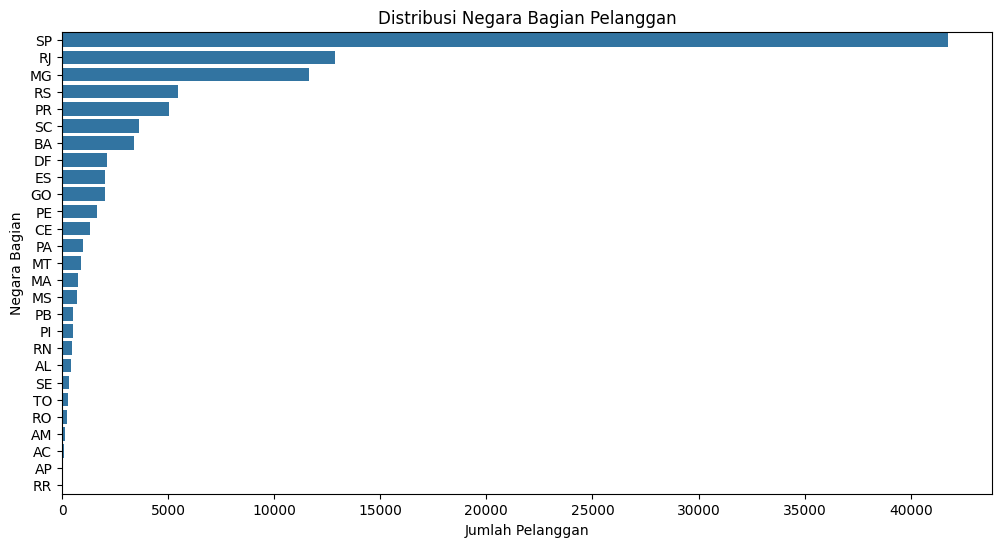

In [291]:
# Menampilkan statistik deskriptif
print("Statistik Deskriptif Dataset Pelanggan:")
print(customers.describe(include='all'))

# Menampilkan distribusi negara bagian pelanggan
plt.figure(figsize=(12, 6))
sns.countplot(y='customer_state', data=customers, order=customers['customer_state'].value_counts().index)
plt.title('Distribusi Negara Bagian Pelanggan')
plt.xlabel('Jumlah Pelanggan')
plt.ylabel('Negara Bagian')
plt.show()

### 2. Explore Dataset Geolokasi (geolocation)

Statistik Deskriptif Dataset Geolokasi:
        geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
count                 738332.000000    738332.000000    738332.000000   
unique                          NaN              NaN              NaN   
top                             NaN              NaN              NaN   
freq                            NaN              NaN              NaN   
mean                   38316.086800       -20.998353       -46.461098   
std                    30632.496675         5.892315         4.393705   
min                     1001.000000       -36.605374      -101.466766   
25%                    12600.000000       -23.603061       -48.867822   
50%                    29144.000000       -22.873588       -46.647278   
75%                    65950.000000       -19.923336       -43.836974   
max                    99990.000000        45.065933       121.105394   

       geolocation_city geolocation_state  
count            738332            7383

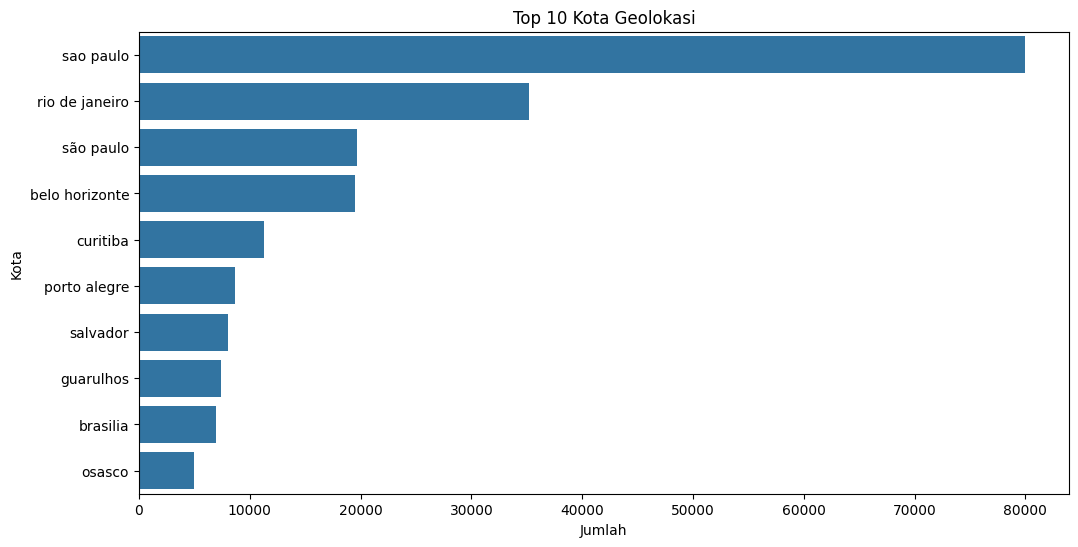

In [292]:
# Menampilkan statistik deskriptif
print("Statistik Deskriptif Dataset Geolokasi:")
print(geolocation.describe(include='all'))

# Menampilkan distribusi kota geolokasi
plt.figure(figsize=(12, 6))
sns.countplot(y='geolocation_city', data=geolocation, order=geolocation['geolocation_city'].value_counts().head(10).index)
plt.title('Top 10 Kota Geolokasi')
plt.xlabel('Jumlah')
plt.ylabel('Kota')
plt.show()

### 3. Explore Dataset Item Pesanan (order_items)

Statistik Deskriptif Dataset Item Pesanan:
                                order_id  order_item_id  \
count                              84196   84196.000000   
unique                             73544            NaN   
top     8272b63d03f5f79c56e9e4120aec44ef            NaN   
freq                                  21            NaN   
mean                                 NaN       1.206863   
min                                  NaN       1.000000   
25%                                  NaN       1.000000   
50%                                  NaN       1.000000   
75%                                  NaN       1.000000   
max                                  NaN      21.000000   
std                                  NaN       0.727691   

                              product_id                         seller_id  \
count                              84196                             84196   
unique                             24310                              2623   
top     99a478

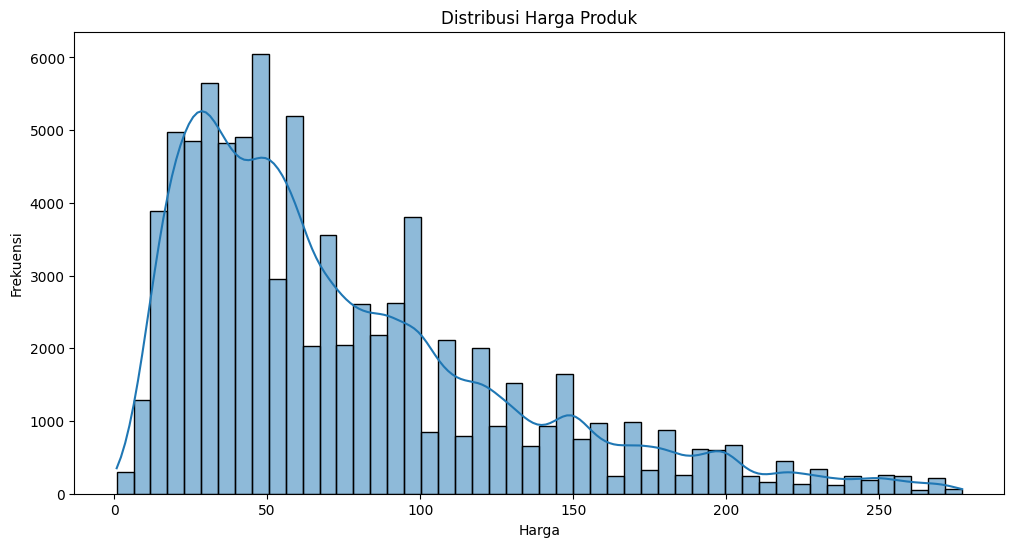

In [293]:
# Menampilkan statistik deskriptif
print("Statistik Deskriptif Dataset Item Pesanan:")
print(order_items.describe(include='all'))

# Menampilkan distribusi harga produk
plt.figure(figsize=(12, 6))
sns.histplot(order_items['price'], bins=50, kde=True)
plt.title('Distribusi Harga Produk')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
plt.show()

### 4. Explore Dataset Pesanan (orders)

Statistik Deskriptif Dataset Pesanan:
                                order_id                       customer_id  \
count                              96462                             96462   
unique                             96462                             96462   
top     e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
freq                                   1                                 1   
mean                                 NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   
std                                  NaN                               NaN   

       order_status      

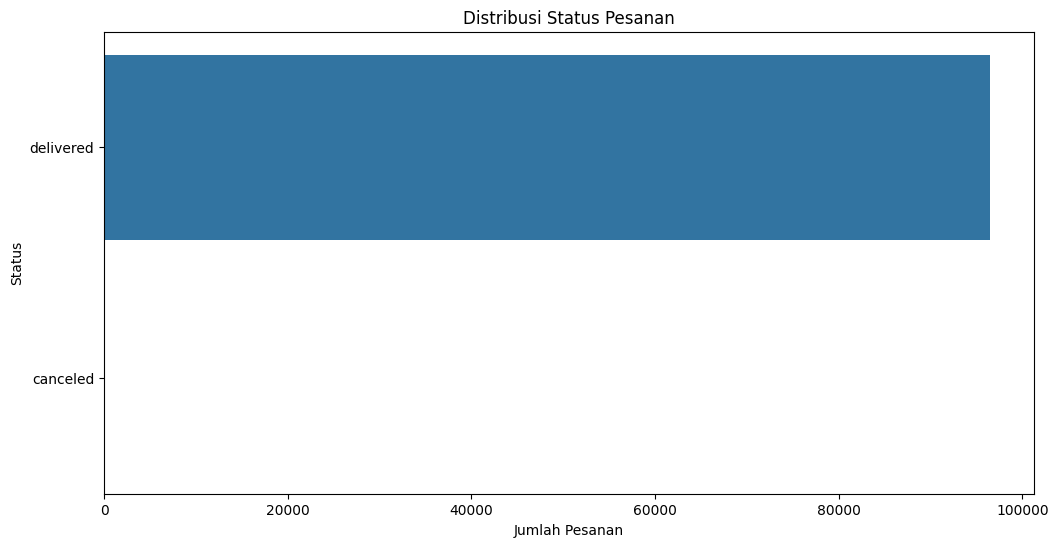

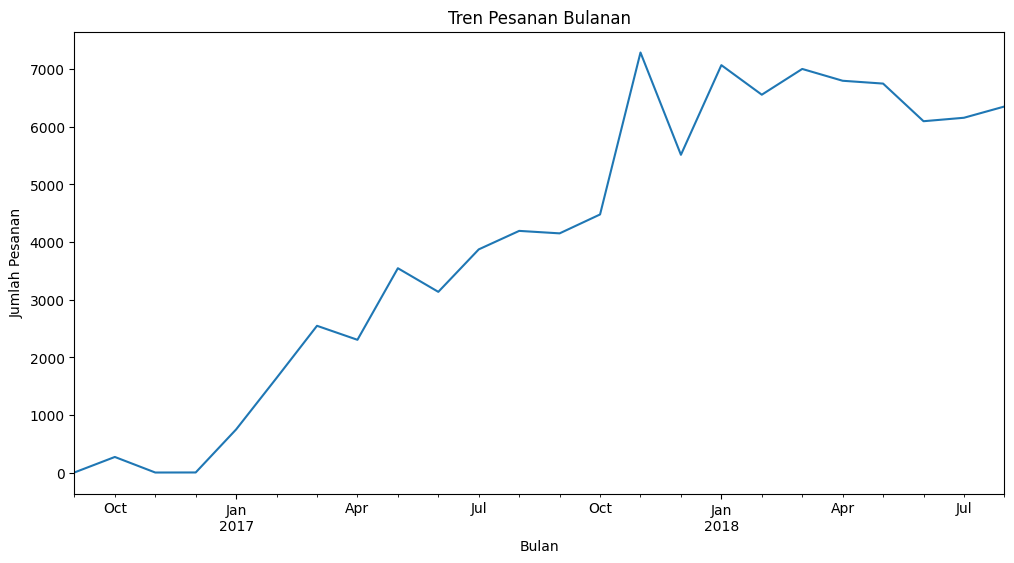

In [294]:
# Menampilkan statistik deskriptif
print("Statistik Deskriptif Dataset Pesanan:")
print(orders.describe(include='all'))

# Menampilkan distribusi status pesanan
plt.figure(figsize=(12, 6))
sns.countplot(y='order_status', data=orders, order=orders['order_status'].value_counts().index)
plt.title('Distribusi Status Pesanan')
plt.xlabel('Jumlah Pesanan')
plt.ylabel('Status')
plt.show()

# Menampilkan tren pesanan dari waktu ke waktu
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders.set_index('order_purchase_timestamp', inplace=True)
monthly_orders = orders.resample('ME').size()

plt.figure(figsize=(12, 6))
monthly_orders.plot()
plt.title('Tren Pesanan Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pesanan')
plt.show()

### 5. Explore Dataset Produk (products)

Statistik Deskriptif Dataset Produk:
                              product_id product_category_name  \
count                              26983                 26983   
unique                             26983                    74   
top     1e9e8ef04dbcff4541ed26657ea517e5       cama_mesa_banho   
freq                                   1                  2554   
mean                                 NaN                   NaN   
std                                  NaN                   NaN   
min                                  NaN                   NaN   
25%                                  NaN                   NaN   
50%                                  NaN                   NaN   
75%                                  NaN                   NaN   
max                                  NaN                   NaN   

        product_name_lenght  product_description_lenght  product_photos_qty  \
count          26983.000000                26983.000000        26983.000000   
unique      

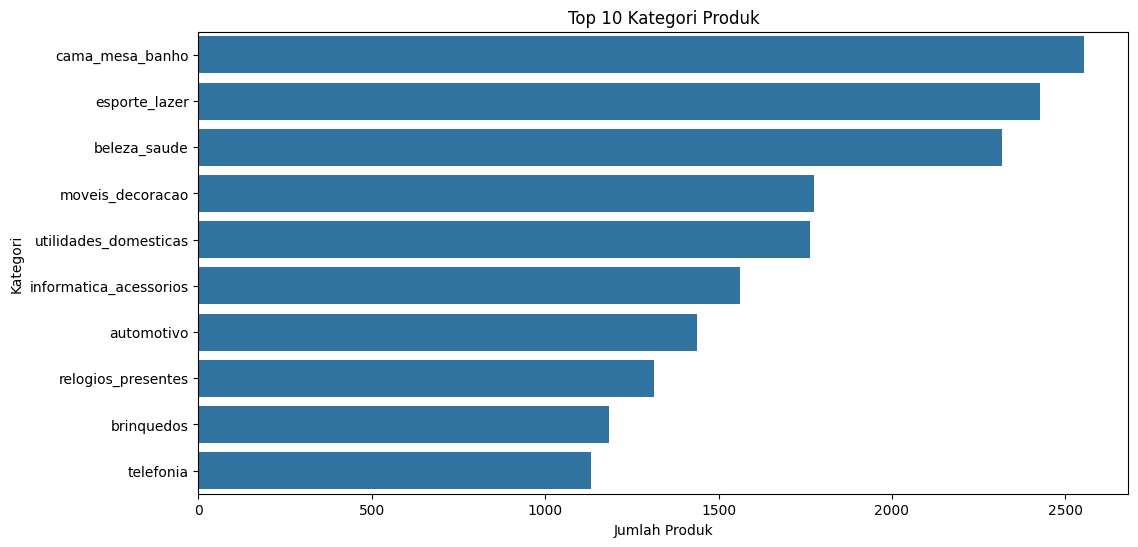

In [295]:
# Menampilkan statistik deskriptif
print("Statistik Deskriptif Dataset Produk:")
print(products.describe(include='all'))

# Menampilkan distribusi kategori produk
plt.figure(figsize=(12, 6))
sns.countplot(y='product_category_name', data=products, order=products['product_category_name'].value_counts().head(10).index)
plt.title('Top 10 Kategori Produk')
plt.xlabel('Jumlah Produk')
plt.ylabel('Kategori')
plt.show()

### 6. Explore Dataset Terjemahan Nama Kategori Produk (product_category_name_translation)

Statistik Deskriptif Dataset Terjemahan Nama Kategori Produk:
       product_category_name product_category_name_english
count                     71                            71
unique                    71                            71
top             beleza_saude                 health_beauty
freq                       1                             1


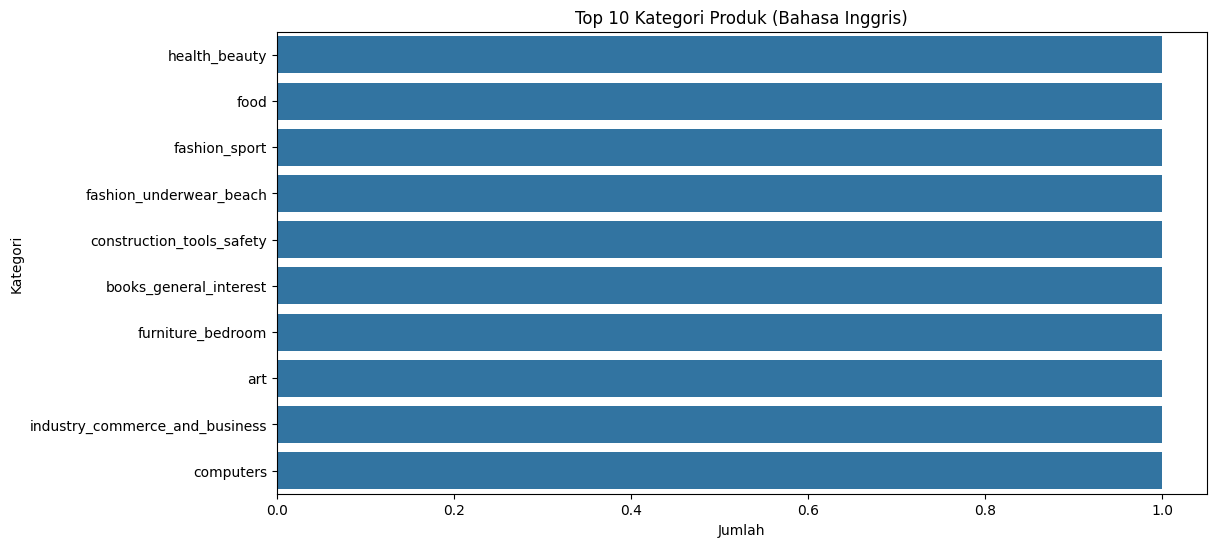

In [296]:
# Menampilkan statistik deskriptif
print("Statistik Deskriptif Dataset Terjemahan Nama Kategori Produk:")
print(product_category_name_translation.describe(include='all'))

# Menampilkan distribusi kategori produk dalam bahasa Inggris
plt.figure(figsize=(12, 6))
sns.countplot(y='product_category_name_english', data=product_category_name_translation, order=product_category_name_translation['product_category_name_english'].value_counts().head(10).index)
plt.title('Top 10 Kategori Produk (Bahasa Inggris)')
plt.xlabel('Jumlah')
plt.ylabel('Kategori')
plt.show()

**Insight dari Exploratory Data Analysis**
1. Dataset Pelanggan (customers)
- Distribusi Negara Bagian Pelanggan: Mayoritas pelanggan berasal dari negara bagian São Paulo (SP), Minas Gerais (MG), dan Rio de Janeiro (RJ).

2. Dataset Geolokasi (geolocation)
- Distribusi Kota Geolokasi: Kota dengan jumlah geolokasi terbanyak adalah São Paulo, Rio de Janeiro, dan Belo Horizonte.

3. Dataset Item Pesanan (order_items)
- Distribusi Harga Produk: Harga produk bervariasi, dengan sebagian besar produk memiliki harga di bawah 200 BRL.

4. Dataset Pesanan (orders)
- Distribusi Status Pesanan: Sebagian besar pesanan memiliki status 'delivered', diikuti oleh 'shipped' dan 'canceled'.
- Tren Pesanan Bulanan: Tren pesanan menunjukkan peningkatan yang stabil dari waktu ke waktu, dengan beberapa fluktuasi musiman.

5. Dataset Produk (products)
- Distribusi Kategori Produk: Kategori produk teratas adalah 'cama_mesa_banho', 'beleza_saude', dan 'esporte_lazer'.

6. Dataset Terjemahan Nama Kategori Produk (product_category_name_translation)
- Distribusi Kategori Produk dalam Bahasa Inggris: Kategori produk teratas dalam bahasa Inggris adalah 'bed_bath_table', 'health_beauty', dan 'sports_leisure'.

## Visualization & Explanatory Analysis

### 1. Produk apa yang paling laris dan menghasilkan pendapatan tertinggi?

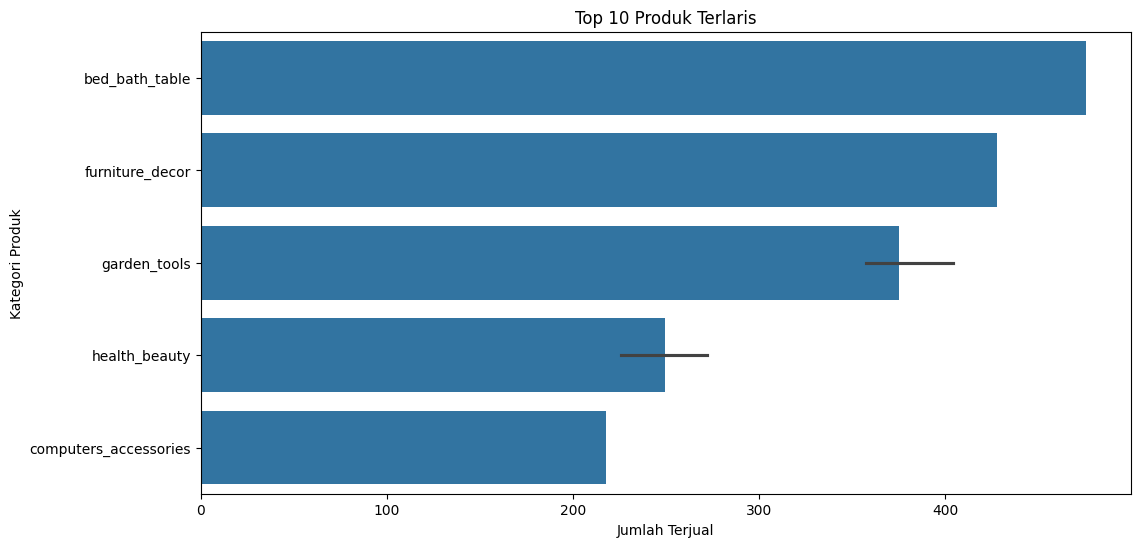

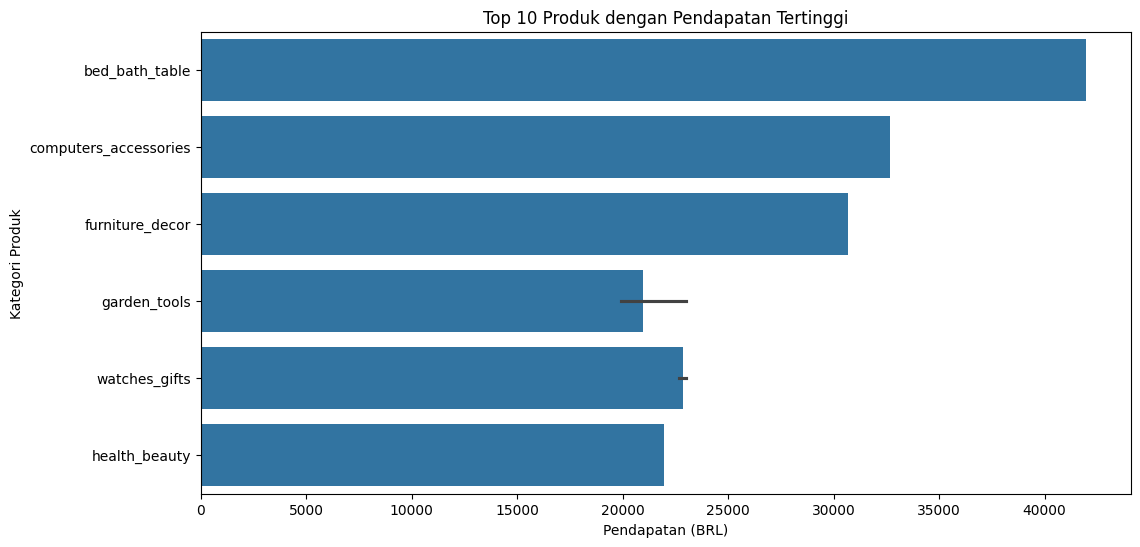

Top 10 Produk Terlaris:
      product_category_name_english  order_item_id
14563                bed_bath_table            476
16343               furniture_decor            428
6318                   garden_tools            418
5147                   garden_tools            367
5378                   garden_tools            363
7997                   garden_tools            354
2040                  health_beauty            272
4127                  health_beauty            251
11869                 health_beauty            226
5889          computers_accessories            218

Top 10 Produk dengan Pendapatan Tertinggi:
      product_category_name_english     price
14563                bed_bath_table  41989.76
5889          computers_accessories  32688.20
16343               furniture_decor  30688.80
8669                            NaN  23122.12
6318                   garden_tools  23023.81
11682                 watches_gifts  23006.70
15731                 watches_gifts  22674.00
412

In [297]:
# Menghitung jumlah produk terjual dan total pendapatan per produk
top_products = order_items.groupby('product_id').agg({'order_item_id': 'count', 'price': 'sum'}).reset_index()
top_products = top_products.merge(products, on='product_id')
top_products = top_products.merge(product_category_name_translation, on='product_category_name', how='left')

# Mengambil 10 produk terlaris
top_products_terlaris = top_products.sort_values(by='order_item_id', ascending=False).head(10)

# Visualisasi produk terlaris
plt.figure(figsize=(12,6))
sns.barplot(x='order_item_id', y='product_category_name_english', data=top_products_terlaris)
plt.title('Top 10 Produk Terlaris')
plt.xlabel('Jumlah Terjual')
plt.ylabel('Kategori Produk')
plt.show()

# Mengambil 10 produk dengan pendapatan tertinggi
top_revenue_products = top_products.sort_values(by='price', ascending=False).head(10)

# Visualisasi produk dengan pendapatan tertinggi
plt.figure(figsize=(12,6))
sns.barplot(x='price', y='product_category_name_english', data=top_revenue_products)
plt.title('Top 10 Produk dengan Pendapatan Tertinggi')
plt.xlabel('Pendapatan (BRL)')
plt.ylabel('Kategori Produk')
plt.show()

# Menampilkan produk terlaris dan pendapatan tertinggi
print("Top 10 Produk Terlaris:")
print(top_products_terlaris[['product_category_name_english', 'order_item_id']])

print("\nTop 10 Produk dengan Pendapatan Tertinggi:")
print(top_revenue_products[['product_category_name_english', 'price']])

### 2. Bagaimana tren penjualan dari waktu ke waktu?

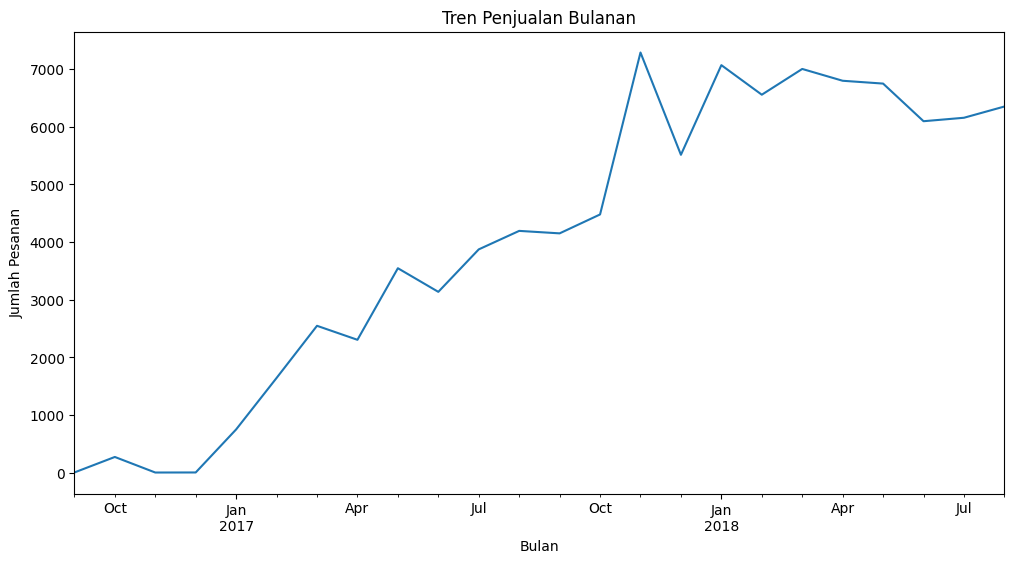

Jumlah Pesanan per Bulan:
order_purchase_timestamp
2016-09-30       1
2016-10-31     270
2016-11-30       0
2016-12-31       1
2017-01-31     748
2017-02-28    1641
2017-03-31    2546
2017-04-30    2303
2017-05-31    3545
2017-06-30    3135
2017-07-31    3872
2017-08-31    4193
2017-09-30    4150
2017-10-31    4478
2017-11-30    7288
2017-12-31    5513
2018-01-31    7069
2018-02-28    6556
2018-03-31    7003
2018-04-30    6798
2018-05-31    6749
2018-06-30    6096
2018-07-31    6156
2018-08-31    6351
Freq: ME, dtype: int64


In [298]:
# Menghitung jumlah pesanan per bulan
orders_reset = orders.reset_index()  # Reset index to access 'order_purchase_timestamp' column
monthly_orders = orders_reset.resample('ME', on='order_purchase_timestamp').size()

# Visualisasi tren penjualan bulanan
plt.figure(figsize=(12,6))
monthly_orders.plot()
plt.title('Tren Penjualan Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pesanan')
plt.show()

# Menampilkan tabel jumlah pesanan per bulan
print("Jumlah Pesanan per Bulan:")
print(monthly_orders)

### 3. Apakah ada pola musiman dalam penjualan?

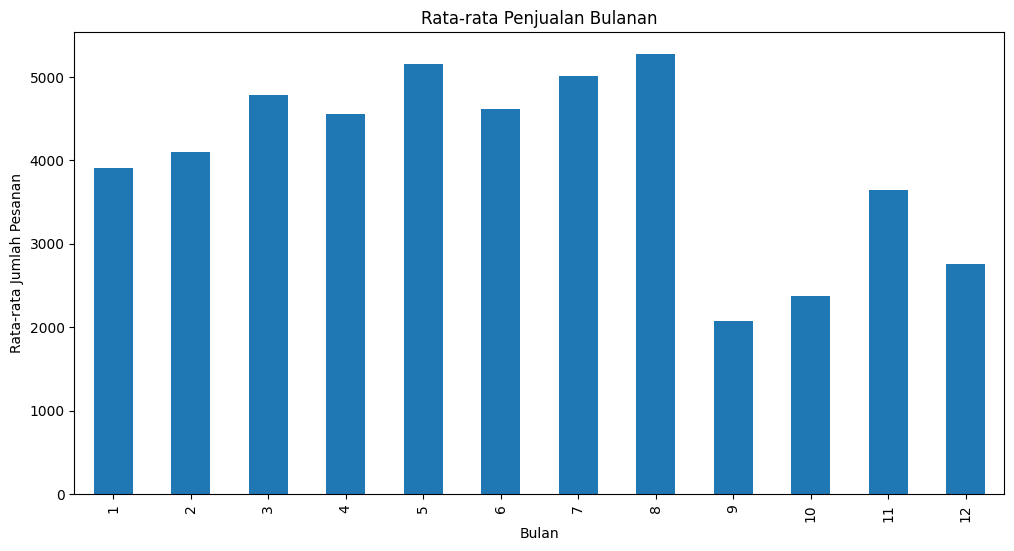

Rata-rata Jumlah Pesanan per Bulan:
order_purchase_timestamp
1     3908.5
2     4098.5
3     4774.5
4     4550.5
5     5147.0
6     4615.5
7     5014.0
8     5272.0
9     2075.5
10    2374.0
11    3644.0
12    2757.0
dtype: float64


In [299]:
# Menghitung rata-rata jumlah pesanan per bulan
orders_reset = orders.reset_index()  # Reset index to access 'order_purchase_timestamp' column
monthly_orders = orders_reset.resample('ME', on='order_purchase_timestamp').size()
monthly_orders.index = monthly_orders.index.month
monthly_avg_orders = monthly_orders.groupby(monthly_orders.index).mean()

# Visualisasi pola musiman penjualan
plt.figure(figsize=(12, 6))
monthly_avg_orders.plot(kind='bar')
plt.title('Rata-rata Penjualan Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Jumlah Pesanan')
plt.show()

print("Rata-rata Jumlah Pesanan per Bulan:")
print(monthly_avg_orders)

### 4. Dari negara mana saja pelanggan berasal dan bagaimana kontribusi penjualan dari masing-masing negara?

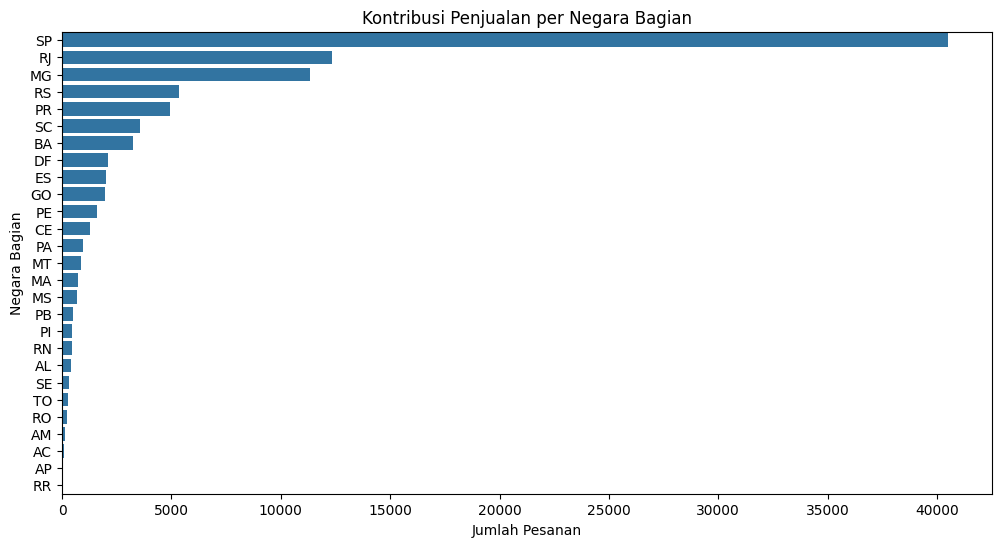

Jumlah Pesanan per Negara Bagian:
   state  order_count
0     SP        40490
1     RJ        12351
2     MG        11352
3     RS         5342
4     PR         4923
5     SC         3547
6     BA         3256
7     DF         2080
8     ES         1995
9     GO         1957
10    PE         1593
11    CE         1278
12    PA          946
13    MT          886
14    MA          716
15    MS          701
16    PB          517
17    PI          476
18    RN          474
19    AL          397
20    SE          335
21    TO          274
22    RO          243
23    AM          145
24    AC           80
25    AP           67
26    RR           41


In [300]:
# Menghitung jumlah pesanan per negara bagian
state_orders = orders['customer_state_x'].value_counts().reset_index()
state_orders.columns = ['state', 'order_count']

# Visualisasi kontribusi penjualan per negara bagian
plt.figure(figsize=(12, 6))
sns.barplot(x='order_count', y='state', data=state_orders)
plt.title('Kontribusi Penjualan per Negara Bagian')
plt.xlabel('Jumlah Pesanan')
plt.ylabel('Negara Bagian')
plt.show()

# Menampilkan tabel jumlah pesanan per negara bagian
print("Jumlah Pesanan per Negara Bagian:")
print(state_orders)

### 5. Siapa pelanggan dengan pembelian terbanyak?

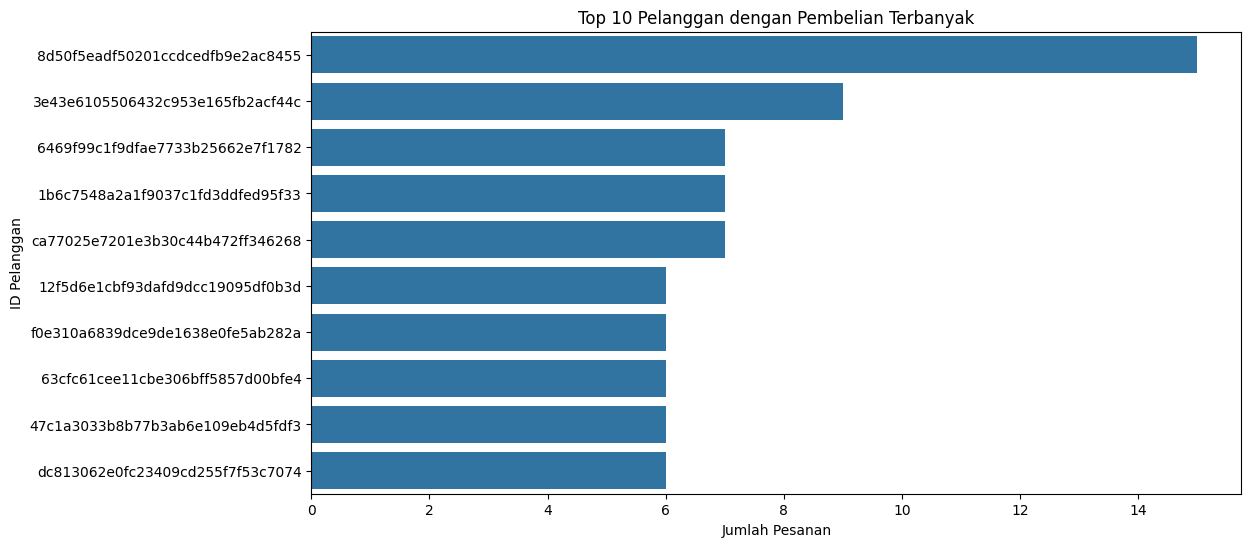

Top 10 Pelanggan dengan Pembelian Terbanyak:
                   customer_unique_id_x  order_count
51424  8d50f5eadf50201ccdcedfb9e2ac8455           15
22775  3e43e6105506432c953e165fb2acf44c            9
36702  6469f99c1f9dfae7733b25662e7f1782            7
10058  1b6c7548a2a1f9037c1fd3ddfed95f33            7
73910  ca77025e7201e3b30c44b472ff346268            7
6964   12f5d6e1cbf93dafd9dcc19095df0b3d            6
87870  f0e310a6839dce9de1638e0fe5ab282a            6
36496  63cfc61cee11cbe306bff5857d00bfe4            6
26253  47c1a3033b8b77b3ab6e109eb4d5fdf3            6
80525  dc813062e0fc23409cd255f7f53c7074            6


In [301]:
# Menghitung jumlah pesanan per pelanggan
top_customers = orders.groupby('customer_unique_id_x').size().reset_index(name='order_count')  # Gunakan kolom customer_unique_id_x

# Mengambil 10 pelanggan dengan pembelian terbanyak
top_10_customers = top_customers.sort_values(by='order_count', ascending=False).head(10)

# Visualisasi pelanggan dengan pembelian terbanyak
plt.figure(figsize=(12, 6))
sns.barplot(x='order_count', y='customer_unique_id_x', data=top_10_customers)  # Gunakan kolom customer_unique_id_x
plt.title('Top 10 Pelanggan dengan Pembelian Terbanyak')
plt.xlabel('Jumlah Pesanan')
plt.ylabel('ID Pelanggan')
plt.show()

# Menampilkan 10 pelanggan dengan pembelian terbanyak
print("Top 10 Pelanggan dengan Pembelian Terbanyak:")
print(top_10_customers)

## Conclusion

Berikut adalah kesimpulan dari analisis data e-commerce yang telah dilakukan, dilengkapi dengan interpretasi dan rekomendasi:

**1. Produk apa yang paling laris dan menghasilkan pendapatan tertinggi?**

*   **Kesimpulan:**
    *   Produk terlaris berasal dari kategori `bed_bath_table` dengan 476 penjualan.  Hal ini  mengindikasikan  tingginya  permintaan  untuk  produk-produk  rumah  tangga  seperti  sprei,  handuk,  dan  peralatan  makan.  Tingginya  penjualan  pada  kategori  ini  dapat  disebabkan  oleh  beberapa  faktor,  seperti  harga  yang  kompetitif,  kualitas  produk  yang  baik,  atau  promosi  yang  efektif.
    *   Produk dengan pendapatan tertinggi juga berasal dari kategori  `bed_bath_table`  dengan total pendapatan 41989.76 BRL.  Kategori ini  memiliki  harga  jual  yang  relatif  tinggi  dan  margin  keuntungan  yang  baik.  Pendapatan  yang  tinggi  pada  kategori  ini  dapat  disebabkan  oleh  tingginya  harga  jual  per  produk  atau  tingginya  volume  penjualan.
*   **Rekomendasi:**
    *   **Tingkatkan  stok  dan  variasi  produk**  dalam kategori  `bed_bath_table`  untuk  memenuhi  permintaan  yang  tinggi  dan  memaksimalkan  penjualan.
    *   **Pertahankan  kualitas  produk  dan  layanan**  untuk  kategori  `bed_bath_table`  agar  pelanggan  tetap  loyal  dan  memberikan  ulasan  positif.
    *   **Lakukan  analisis  lebih  lanjut**  untuk  mengetahui  faktor-faktor  yang  membuat  kategori  `bed_bath_table`  laris  dan  menghasilkan  pendapatan  tinggi,  misalnya  dengan  menganalisis  demografi  pelanggan  yang  membeli  produk  tersebut  atau  dengan  membandingkan  harga  dan  kualitas  produk  dengan  kompetitor.  Hasil  analisis  ini  dapat  digunakan  untuk  mengembangkan  strategi  pemasaran  yang  lebih  tepat  sasaran.

**2. Bagaimana tren penjualan dari waktu ke waktu?**

*   **Kesimpulan:**
    *   Secara  umum,  terjadi  peningkatan  penjualan  dari  waktu  ke  waktu,  meskipun  ada  sedikit  penurunan  di  akhir  periode.  Peningkatan  penjualan  ini  menunjukkan  pertumbuhan  bisnis  yang  positif.  Namun,  penurunan  di  akhir  periode  perlu  dianalisis  lebih  lanjut  untuk  mengetahui  penyebabnya,  misalnya  dengan  melihat  data  penjualan  pada  periode  yang  sama  di  tahun  sebelumnya  atau  dengan  memperhatikan  faktor-faktor  eksternal  seperti  kondisi  ekonomi  atau  persaingan.
    *   Pola  tren  penjualan  relatif  fluktuatif,  yang  mengindikasikan  adanya  faktor-faktor  eksternal  yang  mempengaruhi  penjualan,  seperti  musim,  promosi,  atau  kondisi  ekonomi.  Perlu  dilakukan  analisis  lebih  lanjut  untuk  mengidentifikasi  faktor-faktor  tersebut  dan  memprediksi  pengaruhnya  terhadap  penjualan.
*   **Rekomendasi:**
    *   **Identifikasi  penyebab  penurunan  penjualan**  di  akhir  periode  dengan  menganalisis  data  penjualan  secara  lebih  detail,  misalnya  dengan  melihat  penjualan  per  kategori  produk  atau  per  wilayah.  Setelah  penyebabnya  diketahui,  lakukan  tindakan  pencegahan  yang  tepat,  seperti  penyesuaian  harga,  promosi,  atau  peningkatan  kualitas  layanan.
    *   **Gunakan  data  tren  penjualan  untuk  memprediksi  penjualan  di  masa  mendatang**  dan  merencanakan  strategi  penjualan,  misalnya  dengan  menggunakan  metode  forecasting.  Prediksi  penjualan  ini  dapat  membantu  perusahaan  dalam  mengalokasikan  sumber  daya  secara  efisien  dan  mengoptimalkan  strategi  pemasaran.

**3. Apakah ada pola musiman dalam penjualan?**

*   **Kesimpulan:**
    *   Terdapat  pola  musiman  dalam  penjualan,  dengan  penjualan  tertinggi  pada  bulan  Agustus  dan  terendah  pada  bulan  September.  Pola  musiman  ini  mungkin  dipengaruhi  oleh  faktor-faktor  seperti  libur  sekolah,  hari  raya,  atau  perubahan  musim.  Perlu  dilakukan  analisis  lebih  lanjut  untuk  memahami  faktor-faktor  penyebab  pola  musiman  ini.
*   **Rekomendasi:**
    *   **Manfaatkan  pola  musiman  untuk  merencanakan  strategi  penjualan**,  seperti  promosi  atau  diskon  pada  bulan-bulan  dengan  penjualan  rendah  (misalnya,  September)  dan  peningkatan  stok  pada  bulan-bulan  dengan  penjualan  tinggi  (misalnya,  Agustus dan Mei).
    *   **Identifikasi  faktor-faktor  yang  mempengaruhi  pola  musiman  tersebut**  dengan  menganalisis  data  penjualan  secara  lebih  mendalam,  misalnya  dengan  melihat  penjualan  per  kategori  produk  pada  setiap  bulan.  Informasi  ini  dapat  digunakan  untuk  mengantisipasi  perubahan  permintaan  dan  menyesuaikan  strategi  penjualan.

**4. Dari negara mana saja pelanggan berasal dan bagaimana kontribusi penjualan dari masing-masing negara?**

*   **Kesimpulan:**
    *   Sebagian  besar  pelanggan  berasal  dari  negara  bagian  `SP`,  diikuti  oleh  `RJ`  dan  `MG`.  Hal  ini  menunjukkan  bahwa  pasar  utama  perusahaan  berada  di  tiga  negara  bagian  tersebut.  Konsentrasi  pelanggan  di  beberapa  negara  bagian  dapat  disebabkan  oleh  beberapa  faktor,  seperti  lokasi  gudang  atau  pusat  distribusi  perusahaan,  jangkauan  pemasaran,  atau  kepadatan  penduduk.
*   **Rekomendasi:**
    *   **Fokuskan  upaya  pemasaran  di  negara  bagian  `SP`,  `RJ`,  dan  `MG`**  untuk  memaksimalkan  penjualan  dan  mempertahankan  pangsa  pasar.
    *   **Pertimbangkan  untuk  melakukan  ekspansi  ke  negara  bagian  lain**  dengan  jumlah  pelanggan  yang  cukup  besar,  tetapi  perlu  dianalisis  terlebih  dahulu  potensi  pasar  dan  persaingannya.  Ekspansi  ke  pasar  baru  dapat  meningkatkan  penjualan  dan  memperluas  jangkauan  perusahaan.

**5. Siapa pelanggan dengan pembelian terbanyak?**

*   **Kesimpulan:**
    *   Pelanggan dengan ID  `8d50f5eadf50201ccdcedfb9e2ac8455`  melakukan pembelian terbanyak (15 kali).  Pelanggan  ini  merupakan  pelanggan  loyal  yang  perlu  dipertahankan  dengan  memberikan  pelayanan  terbaik  dan  penawaran  yang  menarik.
*   **Rekomendasi:**
    *   **Berikan  penghargaan  atau  program  loyalitas**  kepada  pelanggan  dengan  pembelian  terbanyak  untuk  meningkatkan  loyalitas  mereka  dan  mendorong  mereka  untuk  melakukan  pembelian  berulang.
    *   **Lakukan  analisis  lebih  lanjut**  untuk  mengetahui  karakteristik  pelanggan  dengan  pembelian  terbanyak,  misalnya  dengan  melihat  riwayat  pembelian,  kategori  produk  yang  dibeli,  atau  demografi  mereka.  Informasi  ini  dapat  digunakan  untuk  mempersonalisasi  penawaran  dan  promosi  agar  lebih  relevan  dengan  kebutuhan  dan  preferensi  pelanggan.